In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import random
import string

import warnings
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [25]:
val_df = pd.read_csv(r"C:\Users\vesel\ML and DS\projects\infotecs тестовое\Разработчик Machine Learning\infotecs\val.csv")

In [26]:
val_df.head()

,domain,is_dga
0,r8s3-zzdxp.ru,1
1,mysolarfocus.com,0
2,m60oax.ru,1
3,kbgckwrax.nl,1
4,mostbetru32new.ru,0


delete domain zone(.com, .ru, .nl etc.)

In [27]:
for i in range(len(val_df)):
    val_df.loc[i, 'domain']=re.sub(r'\.[^./]+?$', '', val_df['domain'][i])

In [28]:
val_df.head()

,domain,is_dga
0,r8s3-zzdxp,1
1,mysolarfocus,0
2,m60oax,1
3,kbgckwrax,1
4,mostbetru32new,0


download dataset with top 1 million most popular domain 2014

In [29]:
top1m = pd.read_csv('https://raw.githubusercontent.com/mozilla/cipherscan/master/top1m/top-1m.csv')

In [30]:
top1m.head()

,1,google.com
0,2,facebook.com
1,3,youtube.com
2,4,yahoo.com
3,5,baidu.com
4,6,wikipedia.org


In [31]:
top1m = pd.DataFrame(np.insert(top1m.values , 0, values=[1, 'google.com'], axis= 0 ))
top1m=top1m.drop(0, axis=1)
top1m=top1m.rename(columns={1:'domain'})
top1m.insert (loc= len(top1m.columns) , column='is_dga', value=[0 for i in range(len(top1m))])

In [32]:
top1m.head()

,domain,is_dga
0,google.com,0
1,facebook.com,0
2,youtube.com,0
3,yahoo.com,0
4,baidu.com,0


In [33]:
print ('True: ',len(val_df[val_df['is_dga']==1]), 'False: ',len(val_df[val_df['is_dga']==0]))

True:  5018 False:  4982


The ratio of true to false is about 50-50  
After that, we analyze the lengths of the domains:

In [34]:
lenghts=[]
for i in val_df[val_df['is_dga']==1]['domain']:
    lenghts.append(len(i))

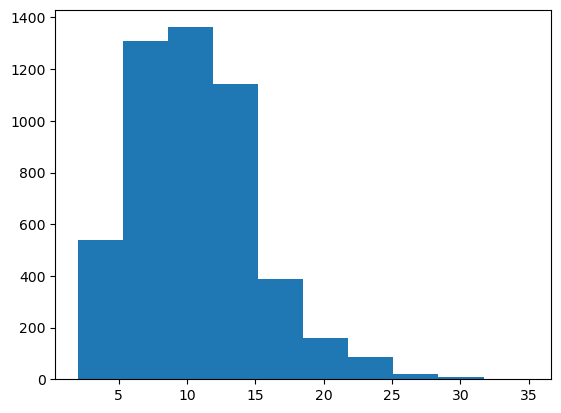

In [35]:
plt.hist(lenghts)
plt.show()

In [36]:
short = []
standart = []
long = []
for i in lenghts:
    if i <=5: short.append(i)
    elif i <=15: standart.append(i)
    else: long.append(i)

In [37]:
print (len(short)/len(lenghts))
print (len(standart)/len(lenghts))
print (len(long)/len(lenghts))

0.10721402949382224
0.7596652052610602
0.13312076524511757


In [38]:
import random
import string

def generate_random_word(length):
    letters = string.ascii_lowercase
    word = ''.join(random.choice(letters) for i in range(length))
    if word=='nan': word = 'ooop'
    return word

word = generate_random_word(5)
print(word)

gsrwh


creating a data frame of length 1000000 with generated domains

In [39]:
gen_domains = []
letters = string.ascii_lowercase*3+string.digits
for i in range(1000000):
    r = random.random()
    if r < 0.11: length = random.randint(2, 6)
    elif r < 0.76: length = random.randint (6, 16)
    else: length = random.randint (16, 36)
    word=(''.join(random.choice(letters) for i in range(length)))
    while word=='nan': word=(''.join(random.choice(letters) for i in range(length)))
    gen_domains.append(word)

In [40]:
gen_df=pd.DataFrame(gen_domains)
gen_df.insert (loc= len(gen_df.columns) , column='is_dga', value=[1 for i in range(len(gen_df))])
gen_df=gen_df.rename(columns={0:'domain'})

In [41]:
gen_df.head()

,domain,is_dga
0,4fjricvizb,1
1,d8qozh0,1
2,lwefonpokmurys,1
3,cgrdinayexpv7rwojcch1assupne6vsd,1
4,s2hujqcljrau3,1


In [42]:
res = pd.concat([top1m, gen_df]).sample(frac=1, ignore_index=True)

In [43]:
res.head()

,domain,is_dga
0,wildnisverlag.at,0
1,ymyt2s5axz1p,1
2,lgm4az9rzrpuunz5ho01bkc3yih,1
3,fixcomputereasy.com,0
4,vt7zf3izlajsroolzu7jmpuwo,1


The training dataset consists of 1,000,000 real domains taken from Alexa Top 1 MillionSites and 1,000,000 generated domains